## Get galactic gas velocity map data from CGPS HI line data

Track interstellar gas in nearby arms

- Folder: CGPS-MV2_DRAO-ST-HI-line
- File: CGPS_MV2_HI_line_image.fits

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
cubo	= fits.open("CGPS-MV2_DRAO-ST-HI-line/CGPS_MV2_HI_line_image.fits") #abrir objeto cubo de datos



In [3]:
len(cubo)

1

In [4]:

header=cubo[0].header
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
NAXIS3  =                  272 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BLANK   =               -327

In [5]:
def values(h,j):
	N=h['NAXIS'+str(j)];
	val=np.zeros(N);
	for i in range(0,N):
		val[i] = (i+1-float(h['CRPIX'+str(j)]))*float(h['CDELT'+str(j)]) + float(h['CRVAL'+str(j)]);
	return val;

In [6]:
lon=values(header,1)
lat=values(header,2)
vel=values(header,3)



In [7]:
data=cubo[0].data.T
data.shape

(1024, 1024, 272, 1)

In [8]:
lat

array([ 0.44000031,  0.44500031,  0.45000031, ...,  5.54499969,
        5.54999969,  5.55499969])

In [9]:
i_b=0
cut=50
#lv=178
#lv=len(vel)-1
velar=np.ones(len(vel))[cut:-cut]#[:lv]))
for i_l in range(len(lon)):#[::-1]:
    T = data[i_b][i_l].T[0]#[:lv]
    velar=np.vstack((velar,T[cut:-cut]))
    #    latitud[i_b],longitud[i_l]
velar=velar[1:]

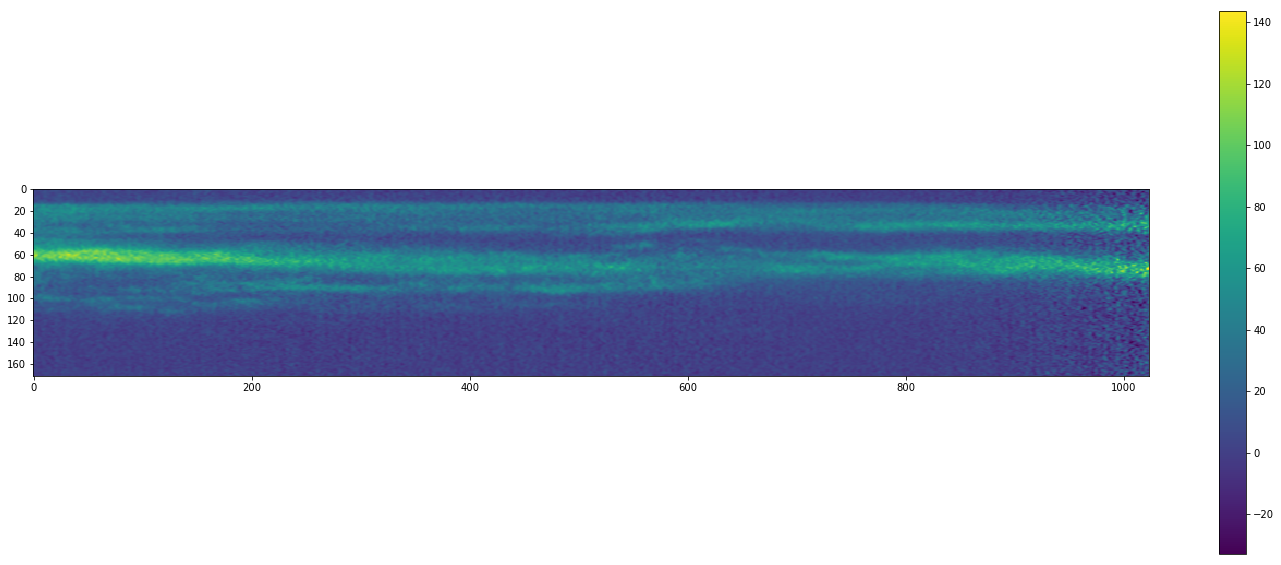

In [10]:
plt.figure(figsize=(25,10))
plt.imshow(velar.T)#,extent=[lon.max(),lon.min(),vel.max()/10,vel.min()/10],cmap='inferno')
plt.colorbar()

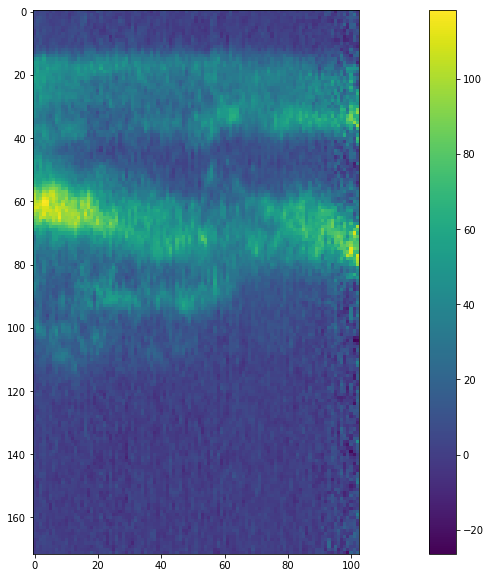

In [11]:
plt.figure(figsize=(25,10))
plt.imshow(velar[::10].T)#,extent=[lon.max(),lon.min(),vel.max()/10,vel.min()/10],cmap='inferno')
plt.colorbar()

In [12]:
velar1=velar[::10]

In [13]:
np.savetxt("21cmsurvey.txt",np.vstack((lon[::10],velar1.T)))

In [14]:
np.savetxt("vel.txt",vel[50:-50])

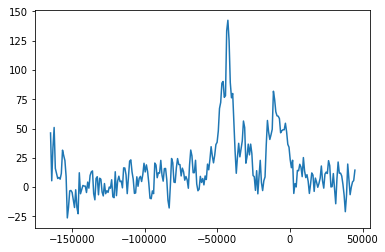

In [15]:
plt.plot(vel,T)

In [16]:
velar[:,1].shape

(1024,)

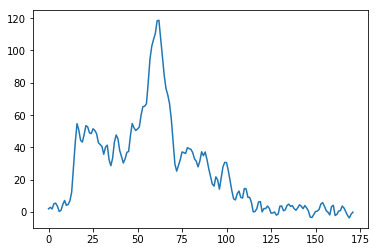

In [17]:
plt.plot(velar[1])

In [18]:
lat

array([ 0.44000031,  0.44500031,  0.45000031, ...,  5.54499969,
        5.54999969,  5.55499969])

In [19]:
lon

array([ 147.30999969,  147.30499969,  147.29999969, ...,  142.20500031,
        142.20000031,  142.19500031])